# Churn Data Analysis In Telecommunications

Source: https://www.kaggle.com/becksddf/churn-in-telecoms-dataset 


Initially, we install all the required libraries.

In [ ]:
!pip install missingno
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import pie, axis, show


Then, we load the csv file into a dataframe 'df'.

In [ ]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

df.head is used to display the first ten rows of the dataframe.

In [ ]:
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


df.describe() is used to analyze the characeristics of the columns in the dataframe.

In [ ]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


df.info() is used to observe the datatypes of the columns in the dataset. From this we can observe that there are 8 float columns, 8 int columns, 4 object columns and 1 bool type column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

Here, the data type of the area code is initially int. But, we are changing the data type of area code column to object as area code should be unique.
Then, we are converting churn column data type into int.

In [ ]:
df['area code'] = df['area code'].astype('object')
df['churn']=df['churn'].astype('int')
df['international plan'] = df['international plan'].astype('category')




Here, we are checking for the unique values.

In [ ]:
df.describe(include=['O'])

,state,area code,phone number,voice mail plan
count,3333,3333,3333,3333
unique,51,3,3333,2
top,WV,415,353-5557,no
freq,106,1655,1,2411


Here, we are dropping the phone number column as the phone number for each user is unique and is not relevant for our analysis on the churn.

In [ ]:
df.drop(["phone number"], axis = 1,)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


# Data Cleaning

By using df.isnull().sum(), we are checking for any null values in the dataframe. From this, we can observe that there are no null values present in the dataframe.

In [ ]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The above analysis is shown in the form of a graph below.

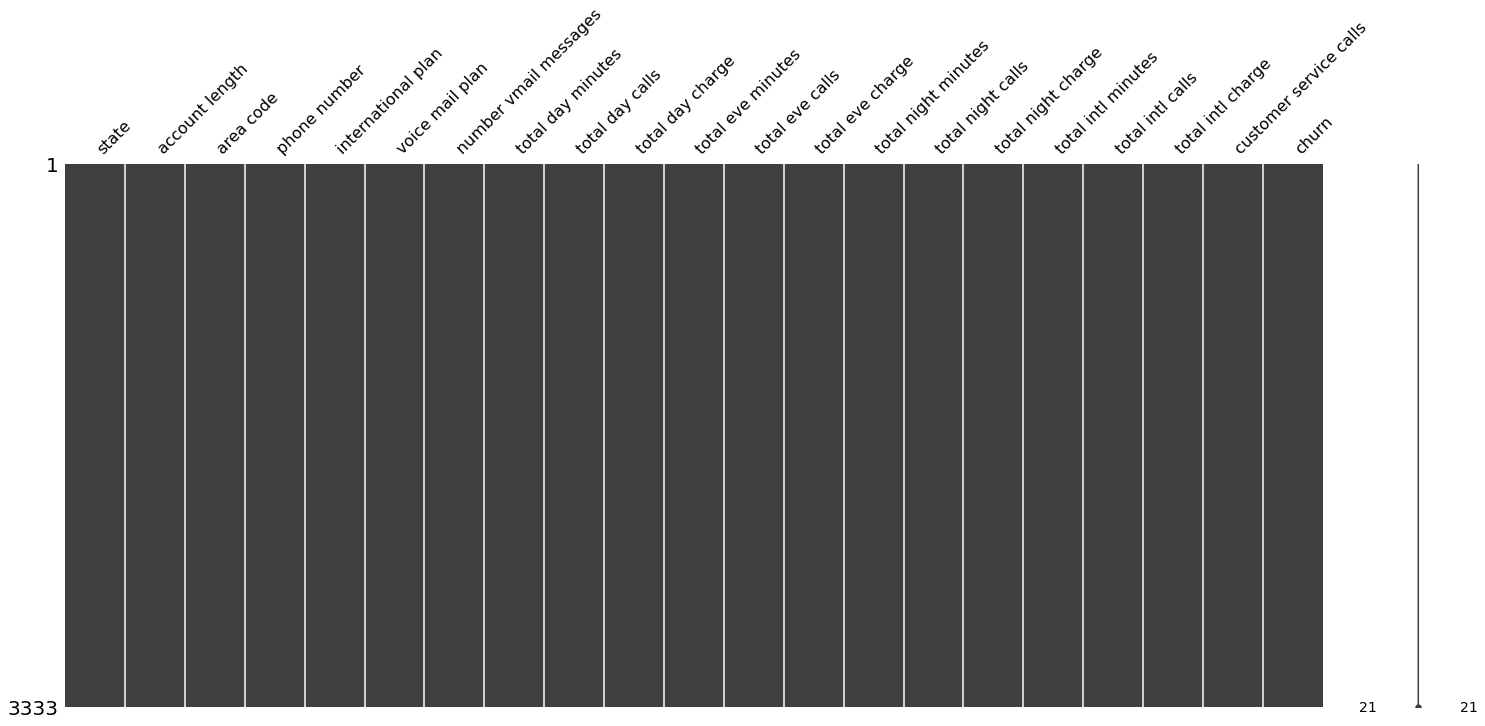

In [ ]:
import missingno as msno
msno.matrix(df)

We can observe that there are no null values

# Analyzing TARGET Column and Various Features

We are using value_counts() to find out the count for each unique value in the churn. We can observe that the rate of people who are trying to churn is less.

In [ ]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

Here, we are calculating the churn percentage and we can observe that the total churn percentage of tth dataframe is 14.491%.

In [ ]:
churn_percentage = df["churn"].sum() * 100 / df["churn"].shape[0]
print("Churn percentage is %.3f%%." % churn_percentage)

Churn percentage is 14.491%.


We are plotting a bar plot to analyze the churn rate. We can observe that there are only few people trying to churn and maximum customers are not planning to churn.

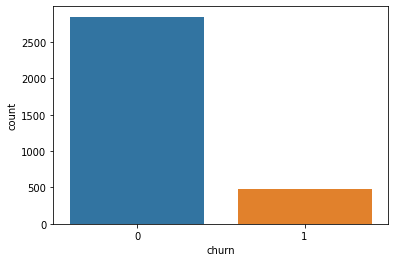

In [ ]:
a=sns.countplot(x='churn',data=df)

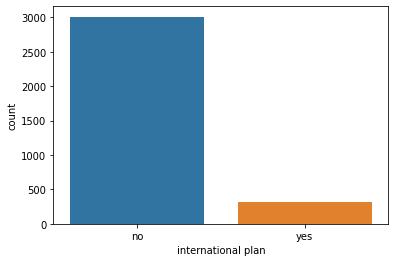

In [ ]:
a=sns.countplot(x='international plan',data=df)

# Correlation between Various Columns
 Here, we are plotting a correlation map to analyze the correlation between columns.

In [ ]:
!pip install plotly
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.offline import plot, iplot

In [ ]:
cr = df.corr()
trace = go.Heatmap(z=cr.values.tolist(), x=cr.columns, y=cr.columns)
data=[trace]
layout = go.Layout(
    title='Visualization for pairwise correlation of the columns',
    width=1100,
    height=800,
    yaxis=go.layout.YAxis(automargin=True),
    xaxis=dict(tickangle=50),
    margin=go.layout.Margin(l=0, r=300, b=300, t=90)
)



fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='heatmap1')

From the above map, we can see that churn has highest correlation with columns total day charge, total day minutes, total eve charge, total eve minutes, total night charge, total night minutes,total intl charge and total intl minutes.

The columns that have highest correlation with the churn variable are the total_day_charge, the total_day_minutes and the number of customer service calls.

MULTICOLLINEAR VARIABLES Night Mins , Night Charge 0.999999

Eve Charge , Eve Mins 1.000000

Day Charge , Day Mins 1.000000

Intl Charge , Intl Mins 0.999993

Here, we are using groupby on churn to group data with other columns and then we are using mean() to find out their mean. We can observe that the mean of total day minutes with respect to churn is highest among all the others.

In [ ]:
df.groupby(['churn']).mean()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,
0,100.793684,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
1,102.664596,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


Here, we plotting a graph to analyze the churn rate with respect to total day charge column.

Text(0.5, 0, 'TOTAL DAY CHARGE vs CHURN RATE')

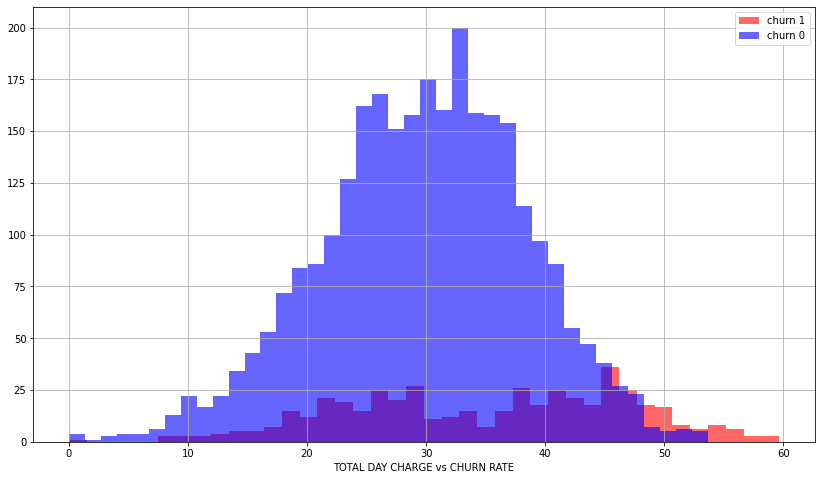

In [ ]:
plt.figure(figsize=(14,8))
df[df['churn']==1]['total day charge'].hist(bins=40,color = 'red',label = 'churn 1',alpha = 0.6)
df[df['churn']==0]['total day charge'].hist(bins = 40,color = 'blue',label = 'churn 0',alpha = 0.6)
plt.legend()
plt.xlabel('TOTAL DAY CHARGE vs CHURN RATE')

From the above graph, we can observe that the rate of churn is high in customers with high day charges.

Then, we are plotting another visualization to analyze the churn rate with respect to customer service calls.

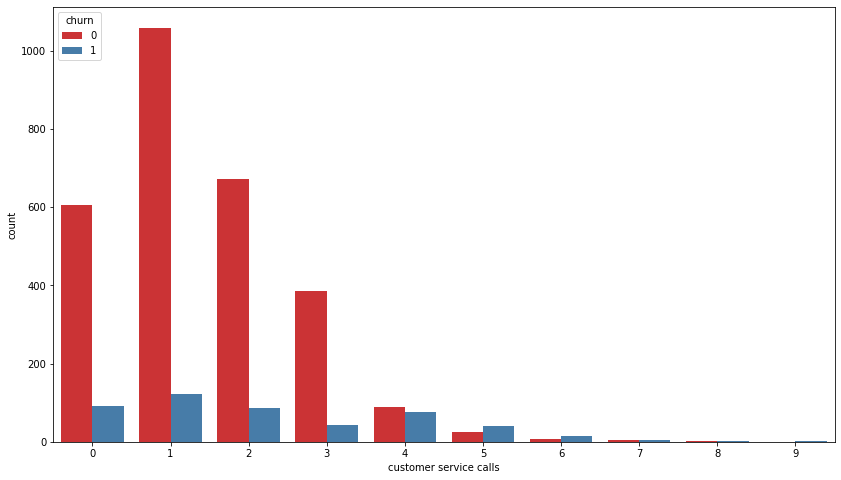

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x='customer service calls',hue = 'churn',data=df,palette='Set1' )

From the above graph, we can observe that churn is directly proportional to customer service calls. That is, churn is increasing with increase in customer service calls.

Here, we are plotting churn with international plan attribute to analyze the churn rate with respect to international plan factor.

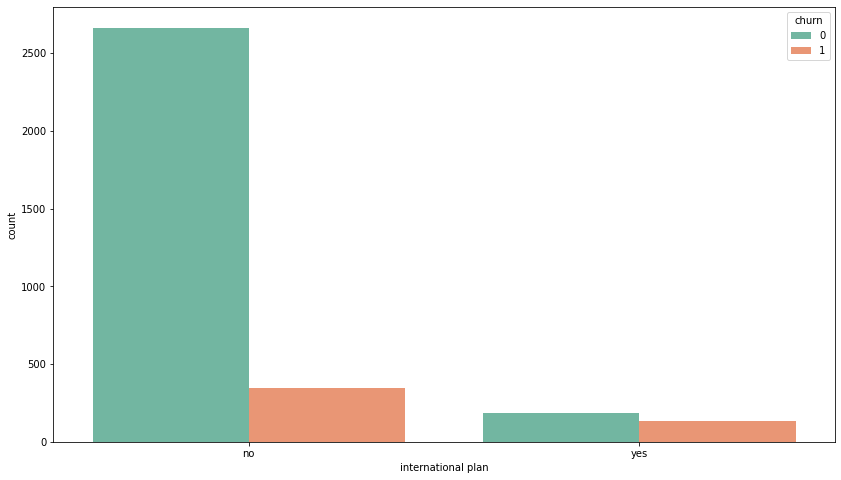

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x ='international plan',hue='churn',data = df,palette='Set2')

From the above plot, we can observe that the churn rate is high for customers with international plan when compared to customers with no international plan. 

# Checking and clipping outliers

Now that we analyzed the correlating factors, let us check for the outliers in the respective columns.

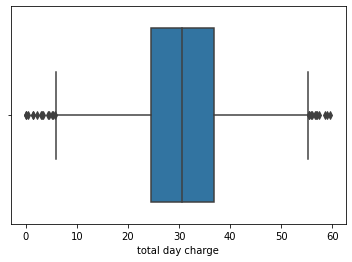

In [ ]:
sns.boxplot(df['total day charge'])

From the above plot, we can observe that range of diversity is extreme. That is, even though more data points lie in the average range, there are few datapoints that are at the extreme corners which has an effect on the analysis. Hence, we are removing the outliers to get better results in the analysis.

In [ ]:
print(df['total day charge'].quantile(0.99))
print(df['total day charge'].quantile(0.01))

51.876799999999996
8.8132


We are plotting the above alterations here by clipping the boundaries.

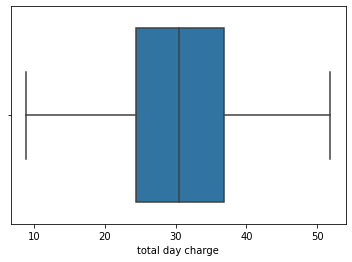

In [ ]:
df['total day charge'].clip(lower =8.81,upper = 51.87,inplace = True)
sns.boxplot(df['total day charge'])

After removing the outliers, analysis can be better.

After plotting total day minutes, we can observe that the majority datapoints are in the middle but there are outliers that are at extremes. Hence, we are removing the outliers.

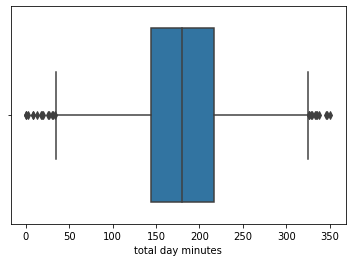

In [ ]:
sns.boxplot(df['total day minutes'])

In [ ]:
print(df['total day minutes'].quantile(0.99))
print(df['total day minutes'].quantile(0.01))

305.168
51.831999999999994


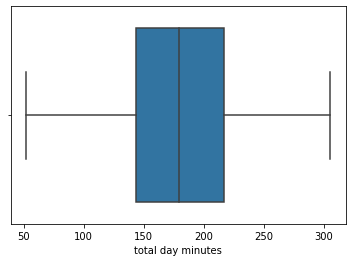

In [ ]:
df['total day minutes'].clip(lower =51.83,upper = 305.168,inplace = True)
sns.boxplot(df['total day minutes'])

The plot range is reduced here to remove the outliers after calculating the average starting and ending range of the plot being 50 and 300 for better analysis results.

We are perfoming the same process of identifying and removing the outliers on total eve charge column.

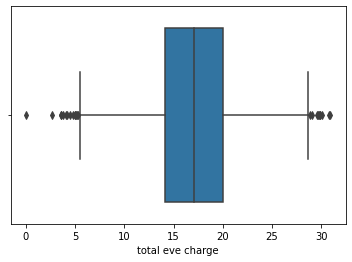

In [ ]:
sns.boxplot(df['total eve charge'])

In [ ]:
print(df['total eve charge'].quantile(0.99))
print(df['total eve charge'].quantile(0.01))

27.113599999999998
6.7592


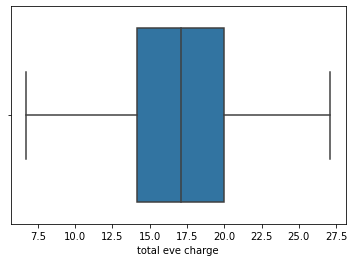

In [ ]:
df['total eve charge'].clip(lower =6.7,upper = 27.113,inplace = True)
sns.boxplot(df['total eve charge'])

After calculating, we can observe that the boundaries are reformed to 7.5 and 27.5 as the extreme data points are removed and average is calculated to be 6.7 and 27.1.

The same process is applied, outliers are identified and clipped after calculating for total eve minutes column.

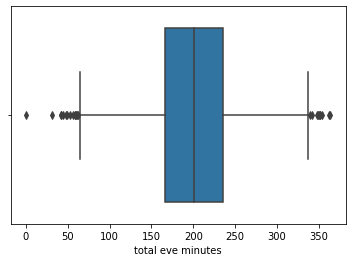

In [ ]:
sns.boxplot(df['total eve minutes'])

In [ ]:
print(df['total eve minutes'].quantile(0.99))
print(df['total eve minutes'].quantile(0.01))

318.936
79.524


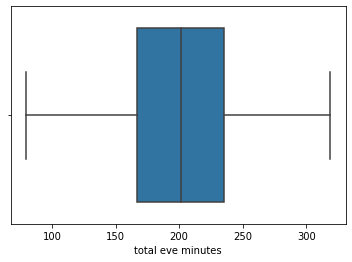

In [ ]:
df['total eve minutes'].clip(lower =79.524,upper = 318.936,inplace = True)
sns.boxplot(df['total eve minutes'])

The same process is applied, outliers are identified and clipped after calculating for total intl minutes column.

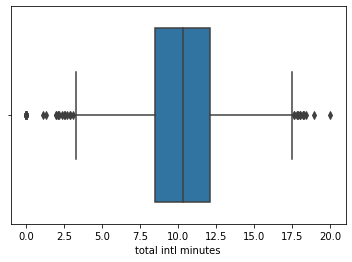

In [ ]:
sns.boxplot(df['total intl minutes'])

In [ ]:
print(df['total intl minutes'].quantile(0.99))
print(df['total intl minutes'].quantile(0.01))

16.667999999999985
3.332


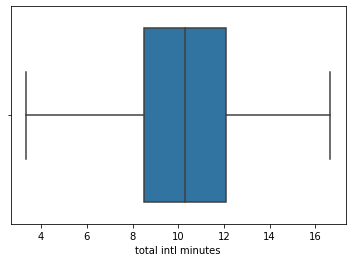

In [ ]:
df['total intl minutes'].clip(lower =3.332,upper = 16.66,inplace = True)
sns.boxplot(df['total intl minutes'])

The same process is applied, outliers are identified and clipped after calculating for total intl charge column.

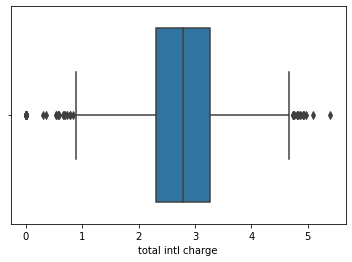

In [ ]:
sns.boxplot(df['total intl charge'])

In [ ]:
print(df['total intl charge'].quantile(0.99))
print(df['total intl charge'].quantile(0.01))

4.5003999999999955
0.8996


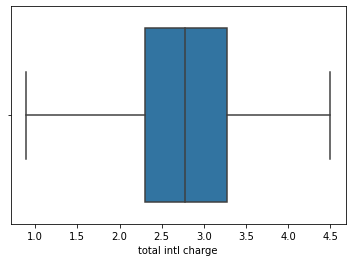

In [ ]:
df['total intl charge'].clip(lower =0.89,upper = 4.50,inplace = True)
sns.boxplot(df['total intl charge'])

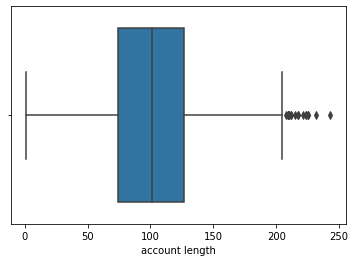

In [ ]:
sns.boxplot(df['account length'])

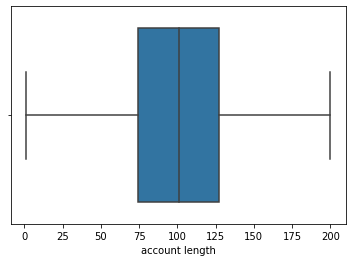

In [ ]:
df['account length'].clip(upper = 200,inplace = True)
sns.boxplot(df['account length'])

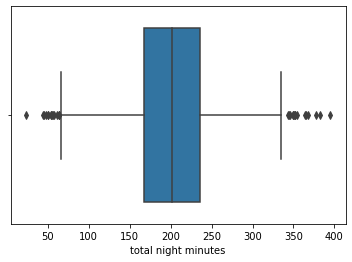

In [ ]:
sns.boxplot(df['total night minutes'])

In [ ]:
print(df['total night minutes'].quantile(0.99))
print(df['total night minutes'].quantile(0.01))

317.4479999999998
79.428


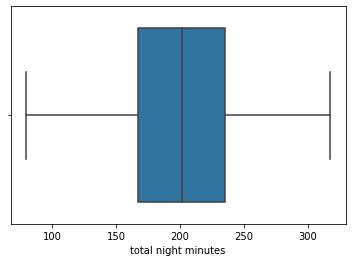

In [ ]:
df['total night minutes'].clip(lower =79.428,upper = 317.44,inplace = True)
sns.boxplot(df['total night minutes'])

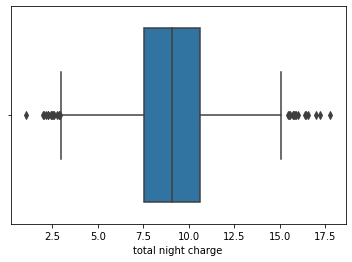

In [ ]:
sns.boxplot(df['total night charge'])

In [ ]:
print(df['total night charge'].quantile(0.99))
print(df['total night charge'].quantile(0.01))

14.283999999999992
3.5764


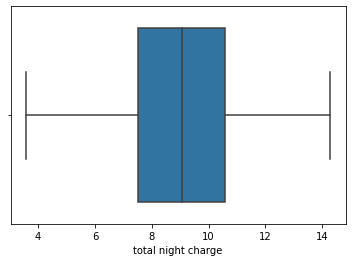

In [ ]:
df['total night charge'].clip(lower =3.57,upper =14.28 ,inplace = True)
sns.boxplot(df['total night charge'])

In [ ]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [ ]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.400,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.500,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.200,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,79.524,88,6.70,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.300,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Model Building:

At this point of time I have used three differnt algorithms to perform classification analysis on this data to predict the churn.
From the family of regression algorithms I have used logistic regression, KNearestNeighbors algorithm to know how NearestNeighbours would work on this data and Random Forest from Regression trees family. Also performed PCA for the dimensionalty reduction creating two new pca components. Created clusters on the columns like state, area code, phone number as these are unique identification codes and can't be used to feed algorithm. Creating clusters have hleped me detect similarities between these 3 columns and helped me feed it to the model.

Creating two dataframes, X with predictor variables and Y with target varibale Churn.

In [ ]:
features = df[['account length','international plan','voice mail plan','number vmail messages','total day calls','total day charge','total eve calls','total eve charge',
      'total night calls','total night charge','total intl calls','total intl charge','customer service calls']]

In [ ]:
target = df[['churn']]

In [ ]:
target.head()

,churn
0,0
1,0
2,0
3,0
4,0


Using pd.get_dummies to covert the categorical(yes/no) columns international plan and voicemail plan to numerical(0/1). It's observed that people with international plan and voicemail plan are more likely to churn.

In [ ]:
features = pd.get_dummies(features,columns=['international plan','voice mail plan'],drop_first=True) ## creating dummy variables for categorical 

In [ ]:
features.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,1
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0
3,84,0,71,50.90,88,6.70,89,8.86,7,1.78,2,1,0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,3,1,0


Feature Scaling of training data using Min-Max sacling to normalize data i.e, to set all fetaures to one range of scale.

                     Xsc = [X-Xmin]/[Xmax-Xmin]
                  -data is sclaed to a range of [0-1]
                  -the cost of having this range, in contrast to standard deviation is we will end up having smaller standard deviation.









In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(features),columns=features.columns)

In [ ]:
features.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes
0,0.638191,0.490196,0.666667,0.842081,0.582353,0.493803,0.408451,0.694678,0.15,0.501385,0.111111,0.0,1.0
1,0.532663,0.509804,0.745455,0.433349,0.605882,0.485965,0.492958,0.735761,0.15,0.778393,0.111111,0.0,1.0
2,0.683417,0.000000,0.690909,0.756386,0.647059,0.176358,0.500000,0.350140,0.25,0.664820,0.000000,0.0,0.0
3,0.417085,0.000000,0.430303,0.977473,0.517647,0.000000,0.394366,0.493931,0.35,0.246537,0.222222,1.0,0.0
4,0.371859,0.000000,0.684848,0.453553,0.717647,0.289521,0.619718,0.451914,0.15,0.509695,0.333333,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## Splitting X and Y dataframes into train, test sets using train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.30, random_state=42)

## LogisticRegression Model:


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
## Fitting LogisticRegression model on features_train and target_train
Log_clf = LogisticRegression(random_state=42,class_weight='balanced').fit(features_train, target_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



$p=1/1+e^{-(b0+b1x)}$

In [ ]:
Log_clf.intercept_  ## this is the expected mean value of y when x=0

array([-4.25233308])

In [ ]:
Log_clf.coef_ ## coefficient of each coulmn variable x1,x2,... here we have 16 columns

array([[ 0.233547  ,  0.73385057,  0.01755383,  2.77104091,  0.15098638,
         1.35901742,  0.02277235,  0.70546853, -1.10227409,  1.0630189 ,
         4.48324286,  2.29471579, -1.22710992]])

In [ ]:
## prediction on Train data
Log_Train_Pred = Log_clf.predict(features_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(classification_report(target_train,Log_Train_Pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1993
           1       0.36      0.73      0.48       340

    accuracy                           0.77      2333
   macro avg       0.65      0.75      0.67      2333
weighted avg       0.86      0.77      0.80      2333



Using logisitc regression algorithm prediction on training data is observed to be 77%.

In [ ]:
## prediction on Test data
Log_Test_Pred = Log_clf.predict(features_test)

In [ ]:
print(classification_report(target_test,Log_Test_Pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       857
           1       0.38      0.80      0.51       143

    accuracy                           0.78      1000
   macro avg       0.67      0.79      0.69      1000
weighted avg       0.88      0.78      0.81      1000



Actually the logistic regression model performed better on tetsing data giving an accuracy of 78%.

# NearestNeighbors:

Applying KNearestNeighbors classifer 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

Below loop runs KNN classifier by changing n_neighbors ranging from 1 to 10, to know the optimum value of K where the accuracy of the KNN model is highest.

In [ ]:
## Calculate optimum value of K 
Error=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(features_train,target_train)
    pred_i=knn.predict(features_test)
    Error.append(accuracy_score(pred_i,target_test))
   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was pa

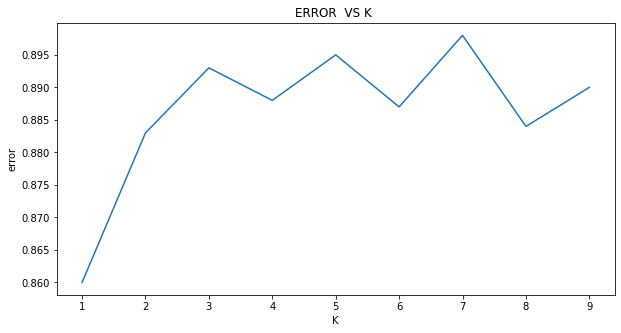

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,10),Error,markersize = 10)
plt.title("ERROR  VS K ")
plt.ylabel('error')
plt.xlabel('K')
plt.show()

Plot shows optimum value of K is 1.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(features_train,target_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn_Train_pred=knn.predict(features_train)

In [ ]:
print(classification_report(target_train,knn_Train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00       340

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333



In [ ]:
knn_Test_pred=knn.predict(features_test)

In [ ]:
print(classification_report(target_test,knn_Test_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       857
           1       0.51      0.47      0.49       143

    accuracy                           0.86      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.86      0.86      0.86      1000



OverFitting, KNN classifer gives 100% accuarcy when applied on training data and drop in accuracy about 14% is observed when applied on testing data. The problem of overfititng of data is observed in this scenario. 

Overfitting is not the only problem over here. Class imbalance, hyper parameters tuning are also affecting the performance of model when applied testing data.

We can observe there are only 483 rows with churn variable as True where as we have 2850 rows with churn as False. This huge difference makes model poor while predicting new variables with True churn though it's predicting 100% for True churn on training data. Hyper parameter tuning would effect predicitons on training data whcih results in predictions on training data closer to that of testing data.

## RandomForest

Using class_weight and few other parameters considering the performance of KNN model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFclf = RandomForestClassifier(n_estimators=300,max_depth=7,min_samples_leaf=5,class_weight='balanced',random_state=42)

In [ ]:
RFclf.fit(features_train,target_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
RFclf_Train_pred=RFclf.predict(features_train)

In [ ]:
print(classification_report(target_train,RFclf_Train_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1993
           1       0.82      0.85      0.84       340

    accuracy                           0.95      2333
   macro avg       0.90      0.91      0.90      2333
weighted avg       0.95      0.95      0.95      2333



As expected parameter tuning has worked. Random forest classifier with out parameters have resulted in 100% training accuracy. Classifier with tuned parameters have reduced performance of training data let's see whether it helps in improving acuuracy of test data.

In [ ]:
RFclf_Test_pred=RFclf.predict(features_test)

In [ ]:
print(classification_report(target_test,RFclf_Test_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       857
           1       0.78      0.83      0.80       143

    accuracy                           0.94      1000
   macro avg       0.87      0.89      0.88      1000
weighted avg       0.94      0.94      0.94      1000



By far RandomForest classifier on the normalized data is the best accuracy we have got. This classifier gives 95% prediction acuuracy on the training data and 94% prediction accuracy on testing data.

In [ ]:
print('f1-score of LogisticRegression Model',classification_report(target_test,Log_Test_Pred))
print('f1-score of KNN Model',classification_report(target_test,knn_Test_pred))
print('f1-score of RandomForest Model',classification_report(target_test,RFclf_Test_pred))

f1-score of LogisticRegression Model               precision    recall  f1-score   support

           0       0.96      0.78      0.86       857
           1       0.38      0.80      0.51       143

    accuracy                           0.78      1000
   macro avg       0.67      0.79      0.69      1000
weighted avg       0.88      0.78      0.81      1000

f1-score of KNN Model               precision    recall  f1-score   support

           0       0.91      0.93      0.92       857
           1       0.51      0.47      0.49       143

    accuracy                           0.86      1000
   macro avg       0.71      0.70      0.70      1000
weighted avg       0.86      0.86      0.86      1000

f1-score of RandomForest Model               precision    recall  f1-score   support

           0       0.97      0.96      0.97       857
           1       0.78      0.83      0.80       143

    accuracy                           0.94      1000
   macro avg       0.87      0.89     

## Clustering:

Finding similarities by clustering Columns like state, area code and phone number which are not used in model bulding in previous models will help and train model to learn  from those similarities. Using K_Means clustering to cluster 3 unique identification columns.

In [ ]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [ ]:
 df2=df[['state','area code', 'phone number']] ## creating a dataframe with those three columns.

In [ ]:
df2.head()

,state,area code,phone number
0,KS,415,382-4657
1,OH,415,371-7191
2,NJ,415,358-1921
3,OH,408,375-9999
4,OK,415,330-6626


In [ ]:
df3=df2.groupby(['area code','state']).agg('count').reset_index() ## grouping by on areacode and state putting count on howmany phone numbers at that instance.

In [ ]:
df3

,area code,state,phone number
0,408,AK,14
1,408,AL,25
2,408,AR,13
3,408,AZ,15
4,408,CA,7
...,...,...,...
148,510,VT,20
149,510,WA,17
150,510,WI,21
151,510,WV,34


In [ ]:
df3['state']=df3['state'].astype('category') 

In [ ]:
df3['state'] = df3['state'].cat.codes ## .cat.codes coverts state category to numerical value 

In [ ]:
L=df3[['state','area code','phone number']]

In [ ]:
from sklearn.cluster import KMeans

Below loop iterates number of clusters ranging from 1 to 10 to know the opitmum value of K.

In [ ]:
WCSS = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=42)
    kmeans.fit(L)
    WCSS.append(kmeans.inertia_) ## this particular syntax hleps us append the sum of suqares with in cluster using kmeans model.


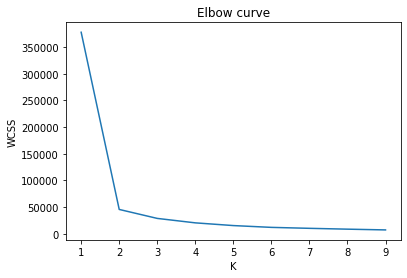

In [ ]:
plt.plot(range(1,10),WCSS)
plt.title('Elbow curve')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

Plotting elbow curve using values of sum of squares for different value of K show the curve begins to flatten between 4 and 5. Righnt now i'm using 5 clusters, which creates 5 different clusters using similarities in 3 columns.

In [ ]:
kmeans = KMeans(n_clusters = 5,max_iter=300,random_state = 3565)

In [ ]:
Y_kmeans= kmeans.fit_predict(L)

In [ ]:
Y_kmeans ## Clusters have been created for on groupby dataframe of areacode and state.

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
df4=df2.groupby(['area code','state']).agg('count').reset_index() ## new dataframe stroing the same areacode and state groupby data.

In [ ]:
df4['cluster']=Y_kmeans ## appending cluster column to the dataframe.

In [ ]:
df5=pd.merge(df2,df4,on=['area code','state']) ## Merging df2 and df4 on areacode and state would allot cluster to all the rows of df2 dataframe and stroing it as df5.

In [ ]:
df['cluster']=df5['cluster'] ## now appending cluster coulmn from df5 to original df.

In [ ]:
df.sample(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,cluster
2699,AL,136,510,352-6732,no,no,0,109.4,91,18.60,207.5,111,17.64,135.0,107,6.08,11.6,5,3.13,0,0,3
651,CT,105,408,357-2679,no,no,0,213.4,100,36.28,204.9,52,17.42,179.7,93,8.09,9.5,6,2.57,1,0,0
1070,MN,75,415,379-7779,no,no,0,143.2,92,24.34,209.1,142,17.77,173.0,96,7.79,11.9,9,3.21,1,0,3
2477,MA,96,415,359-9369,no,no,0,173.9,111,29.56,287.4,105,24.43,204.8,91,9.22,9.1,7,2.46,1,0,0
176,MN,62,415,409-2111,no,no,0,147.1,91,25.01,190.4,107,16.18,195.2,115,8.78,12.2,3,3.29,0,0,4


## PCA

Applying Dimensionality reduction on all the numerical columns and creating new components.

In [ ]:
pca_df=df[[ 'account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']]

In [ ]:
PCA_df=pd.DataFrame(scaler.fit_transform(pca_df))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(PCA_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5',
                          'principal component 6', 'principal component 7','principal component 8', 'principal component 9','principal component 10',
                          'principal component 11', 'principal component 12','principal component 13', 'principal component 14','principal component 15'])

In [ ]:
principalDf.shape

(3333, 15)

In [ ]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15
0,0.482446,-0.244075,0.056428,-0.102170,0.315060,0.138723,-0.044230,-0.079468,-0.077282,-0.050188,-0.000956,0.000095,-0.000052,-0.000090,-0.000046
1,-0.134150,-0.225231,0.107302,-0.428732,0.327878,0.033333,-0.058891,0.006598,-0.064854,-0.136329,-0.021520,-0.000035,-0.000091,0.000137,0.000041
2,0.194510,-0.147750,-0.630275,-0.059818,-0.109540,0.171244,-0.181306,0.010867,0.025773,-0.062845,-0.041289,0.000925,-0.000053,0.000197,-0.000031
3,0.546618,-0.519444,-0.573275,0.477306,-0.080491,-0.095121,0.051662,-0.070760,0.101382,0.201315,0.085631,0.000455,0.001893,-0.000015,-0.000043
4,-0.141377,-0.137928,-0.255874,0.123721,-0.124226,-0.133966,0.137742,0.158108,-0.029571,-0.109820,-0.126728,-0.000531,-0.000203,-0.000041,-0.000009


In [ ]:
churn_df = pd.read_csv("bigml_59c28831336c6604c800002a.csv") ## reloading dataset as churn_df to append two pca components to churn and intl. plan and vmail plan columns.

In [ ]:
churn_df.dropna(axis=0,how='all',inplace=True)

In [ ]:
churn_df = churn_df.reset_index()

In [ ]:
new_df=pd.DataFrame(principalDf)

In [ ]:
new_df['international plan']=churn_df['international plan']

In [ ]:
new_df['voice mail plan']=churn_df['voice mail plan']

In [ ]:
new_df['cluster']=df5['cluster'] ## appending cluster column to new_df dataframe

In [ ]:
pca_features=new_df[['international plan','voice mail plan','cluster',
                     'principal component 1', 'principal component 2','principal component 3', 'principal component 4','principal component 5',
                          'principal component 6', 'principal component 7','principal component 8', 'principal component 9','principal component 10',
                          'principal component 11', 'principal component 12','principal component 13', 'principal component 14','principal component 15'
                     ]]
## creating new variable x for trainingg and tetsing

In [ ]:
pca_features = pd.get_dummies(pca_features,columns=['international plan','voice mail plan','cluster'],drop_first=True) 
## creating dummies would convert the categorical columns to numerical by assigning 0 and 1.

In [ ]:
pca_features.reset_index

<bound method DataFrame.reset_index of       principal component 1  principal component 2  ...  cluster_3  cluster_4
0                  0.482446              -0.244075  ...          1          0
1                 -0.134150              -0.225231  ...          1          0
2                  0.194510              -0.147750  ...          1          0
3                  0.546618              -0.519444  ...          1          0
4                 -0.141377              -0.137928  ...          1          0
...                     ...                    ...  ...        ...        ...
3328              -0.060019              -0.272682  ...          0          0
3329               0.219225              -0.164527  ...          0          0
3330               0.036973               0.390326  ...          0          0
3331               0.199520               0.071812  ...          0          0
3332               0.336091               0.066800  ...          0          0

[3333 rows x 21 columns]

In [ ]:
pca_features.sample(4)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,international plan_yes,voice mail plan_yes,cluster_1,cluster_2,cluster_3,cluster_4
1427,0.332505,0.085923,-0.403748,0.148942,-0.130392,0.372977,0.053413,-0.099817,0.069877,-0.019065,0.023074,0.000490,-0.000104,0.000194,0.000050,0,0,1,0,0,0
1626,0.136343,0.356040,-0.316785,0.288352,-0.130981,0.239209,-0.057082,-0.130252,-0.042704,-0.071415,0.107127,0.000446,0.000103,-0.000287,0.000025,0,0,0,0,0,0
912,-0.233212,-0.125273,-0.456365,0.152957,-0.100720,-0.292870,0.048005,-0.043180,-0.082096,0.047532,0.064221,0.000465,0.000033,0.000331,-0.000060,0,0,0,0,1,0
3193,-0.428792,0.163494,-0.293652,0.128429,-0.117472,-0.080430,-0.087458,0.313458,-0.066269,0.160822,-0.175195,-0.000756,0.000098,0.000166,-0.000010,0,0,0,0,0,1


In [ ]:
pca_target = target

In [ ]:
pca_target.sample(5)

,churn
1139,0
900,0
2105,0
87,0
1178,0


In [ ]:
## Splitting X and Y dataframes into train, test sets using train_test_split
pca_features_train, pca_features_test, pca_target_train, pca_target_test = train_test_split(pca_features,pca_target, test_size=0.30, random_state=42)

Though PCA is meant for Dimensionality Reduction, I'm not really reducing the feature space by eliminating features or combining older onces to create fewer components. Generally we are supposed to drop new pca components which have lower impact on the dependent variable. But, i have decided not to alter the number of columns and created 15 new components using 15 older inputs columns which indeed gave me better predicitons than data with fewer pca components.

In [ ]:
importance = RFclf.feature_importances_
# summarize feature importance
x = []
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v*100))

Feature: 0, Score: 2.86889
Feature: 1, Score: 3.36371
Feature: 2, Score: 3.00487
Feature: 3, Score: 27.59983
Feature: 4, Score: 2.54978
Feature: 5, Score: 7.89916
Feature: 6, Score: 2.93939
Feature: 7, Score: 4.80679
Feature: 8, Score: 3.31900
Feature: 9, Score: 5.97216
Feature: 10, Score: 18.66468
Feature: 11, Score: 14.72940
Feature: 12, Score: 2.28235


In [ ]:
importance = rfclf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v*100))

Feature: 0, Score: 23.52005
Feature: 1, Score: 2.12697
Feature: 2, Score: 2.80466
Feature: 3, Score: 6.06059
Feature: 4, Score: 9.43482
Feature: 5, Score: 2.37889
Feature: 6, Score: 18.65166
Feature: 7, Score: 2.35064
Feature: 8, Score: 3.83829
Feature: 9, Score: 2.28727
Feature: 10, Score: 1.86346
Feature: 11, Score: 2.02063
Feature: 12, Score: 2.36069
Feature: 13, Score: 2.27999
Feature: 14, Score: 3.09334
Feature: 15, Score: 12.73489
Feature: 16, Score: 1.64705
Feature: 17, Score: 0.09374
Feature: 18, Score: 0.16467
Feature: 19, Score: 0.18506
Feature: 20, Score: 0.10264


## RnadomForest+PCA+Cluster

In [ ]:
rfclf = RandomForestClassifier(n_estimators=300,max_depth=7,min_samples_leaf=5,class_weight='balanced',random_state=42)

In [ ]:
rfclf.fit(pca_features_train,pca_target_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rfclf_Train_pred=rfclf.predict(pca_features_train)

In [ ]:
print(classification_report(pca_target_train,rfclf_Train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1993
           1       0.89      0.85      0.87       340

    accuracy                           0.96      2333
   macro avg       0.93      0.92      0.92      2333
weighted avg       0.96      0.96      0.96      2333



In [ ]:
rfclf_Test_pred=rfclf.predict(pca_features_test)

In [ ]:
print(classification_report(pca_target_test,rfclf_Test_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       857
           1       0.82      0.83      0.82       143

    accuracy                           0.95      1000
   macro avg       0.89      0.90      0.90      1000
weighted avg       0.95      0.95      0.95      1000



After all the hard work of creating clusters, PCA components and feeding it to RandomForest Classifier have resulted in 1% increase in accuracy on test data compared to that of simple RandomForest calssifier model. Though it's just 1%, model got better in predicting True churn data by 2% on testing data.

Below are the accuracy comaprions of simple RF model and RandomForest model with PCA and Clusters on test data.




In [ ]:
print('calssification report of RandomForest Test Model',classification_report(target_test,RFclf_Test_pred))
print('calssification report of CLuster+PCA+RandomForest Test Model',classification_report(pca_target_test,rfclf_Test_pred))

calssification report of RandomForest Test Model               precision    recall  f1-score   support

           0       0.97      0.96      0.97       857
           1       0.78      0.83      0.80       143

    accuracy                           0.94      1000
   macro avg       0.87      0.89      0.88      1000
weighted avg       0.94      0.94      0.94      1000

calssification report of CLuster+PCA+RandomForest Test Model               precision    recall  f1-score   support

           0       0.97      0.97      0.97       857
           1       0.82      0.83      0.82       143

    accuracy                           0.95      1000
   macro avg       0.89      0.90      0.90      1000
weighted avg       0.95      0.95      0.95      1000



In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag = BaggingClassifier(rfclf)

In [ ]:
bag.fit(pca_features_train,pca_target_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=7,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=5,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
  

In [ ]:
bag_Train_pred=bag.predict(pca_features_train)

In [ ]:
print(classification_report(pca_target_train,bag_Train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1993
           1       0.89      0.84      0.87       340

    accuracy                           0.96      2333
   macro avg       0.93      0.91      0.92      2333
weighted avg       0.96      0.96      0.96      2333



In [ ]:
bag_Test_pred=bag.predict(pca_features_test)

In [ ]:
print(classification_report(pca_target_test,bag_Test_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       857
           1       0.87      0.80      0.84       143

    accuracy                           0.95      1000
   macro avg       0.92      0.89      0.91      1000
weighted avg       0.95      0.95      0.95      1000



Here, we can observe that accuracy after applying bagging is 95% on test data which is similar to that of previous model.


To evaluate the performance of the model, Learning curve is plotted.

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
BAG = BaggingClassifier(rfclf)

In [ ]:
train_size, train_scores, test_scores = learning_curve(BAG, pca_features,pca_target,train_sizes=np.linspace(.1, 1.0, 5))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: Dat

In [ ]:
train_size

array([ 266,  866, 1466, 2066, 2666])

In [ ]:
train_scores

array([[0.94736842, 0.94736842, 0.95488722, 0.92481203, 0.94360902],
       [0.97459584, 0.97921478, 0.97806005, 0.97228637, 0.96997691],
       [0.97135061, 0.97748977, 0.9638472 , 0.96930423, 0.96248295],
       [0.96805421, 0.96999032, 0.96708616, 0.96660213, 0.96805421],
       [0.96624156, 0.96774194, 0.96249062, 0.96586647, 0.96436609]])

In [ ]:
test_scores

array([[0.85457271, 0.86206897, 0.85457271, 0.85735736, 0.86186186],
       [0.89655172, 0.89205397, 0.90254873, 0.9039039 , 0.90690691],
       [0.91754123, 0.92953523, 0.91454273, 0.92942943, 0.92792793],
       [0.92503748, 0.92653673, 0.94152924, 0.92792793, 0.94294294],
       [0.92503748, 0.92353823, 0.94602699, 0.94144144, 0.95645646]])

In [ ]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('f1-score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()

In [ ]:
title= 'Performance Learning-Curve RandomForest Bagging Classifier'

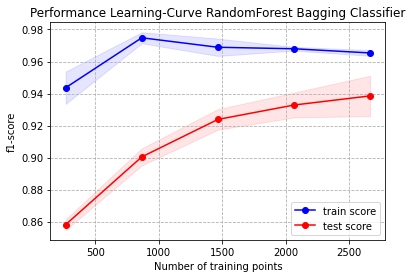

In [ ]:
plot_learning_curve(train_size, train_scores, test_scores, title, alpha=0.1)



A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.

The notable feature of the learning curve is the convergence to a particular score as the number of training samples grows. In particular, once you have enough points that a particular model has converged, adding more training data will not help you! The only way to increase model performance in this case is to use another (often more complex) model.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfclf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(pca_features_train,pca_target_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 55.1min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 62.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=42,
                              

In [ ]:
grid_search.score(pca_features_train,pca_target_train)

0.9892841834547793

In [ ]:
grid_search.score(pca_features_test,pca_target_test)

0.959

With Grid Search, after tuning hyper parameters the accuracy is recorded as 96% i.e increased by 2%.
